<a href="https://colab.research.google.com/github/koushalya-koushi/koushalya/blob/b1/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cars.csv to cars.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
       for filename in filenames:
            print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv('cars.csv')
df.head()

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Alto 800 LXI Opt,2023,410000,10000,Petrol,Individual,Manual,First Owner,19.03 kmpl,999 CC,71.01bhp,96Nm,5.0
1,Skoda Slavia 1.0 TSI Ambition,2023,1350000,10000,Petrol,Individual,Manual,First Owner,14.08 kmpl,1956 CC,167.67bhp,350nm,5.0
2,BMW 3 Series Gran Limousine 320Ld Luxury Line,2023,5800000,1000,Diesel,Dealer,Automatic,First Owner,18.15 kmpl,998 CC,118.35bhp,172Nm,5.0
3,MG ZS EV Exclusive,2023,2650000,10000,Electric,Dealer,Automatic,First Owner,32.52 kmpl,998 CC,58.33bhp,78Nm,5.0
4,Tata Punch Adventure,2023,715000,10000,Petrol,Individual,Manual,First Owner,12.15 kmpl,1451 CC,141bhp,250Nm,5.0


In [ ]:
df.shape

(8148, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8148 entries, 0 to 8147
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           8148 non-null   object 
 1   year           8148 non-null   int64  
 2   selling_price  8148 non-null   int64  
 3   km_driven      8148 non-null   int64  
 4   fuel           8148 non-null   object 
 5   seller_type    8148 non-null   object 
 6   transmission   8148 non-null   object 
 7   owner          8148 non-null   object 
 8   mileage        7927 non-null   object 
 9   engine         7927 non-null   object 
 10  max_power      7933 non-null   object 
 11  torque         7926 non-null   object 
 12  seats          7927 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 827.7+ KB


In [ ]:
df.isnull().mean()

,0
Name,0.000000
year,0.000000
selling_price,0.000000
km_driven,0.000000
fuel,0.000000
seller_type,0.000000
transmission,0.000000
owner,0.000000
mileage,0.027123
engine,0.027123


In [ ]:
df.describe(include='all')

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8148,8148.000000,8.148000e+03,8.148000e+03,8148,8148,8148,8148,7927,7927,7933,7926,7927.000000
unique,2076,NaN,NaN,NaN,5,3,4,5,398,121,331,449,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4407,6780,7078,5306,225,1017,377,530,NaN
mean,NaN,2013.824006,6.401217e+05,6.967571e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.415668
std,NaN,4.059542,8.085638e+05,5.655716e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958604
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.750000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [ ]:
df.describe(include='object')

,Name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8148,8148,8148,8148,8148,7927,7927,7933,7926
unique,2076,5,3,4,5,398,121,331,449
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4407,6780,7078,5306,225,1017,377,530


In [ ]:
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())

['Petrol' 'Diesel' 'Electric' 'CNG' 'LPG']
['Individual' 'Dealer' 'Trustmark Dealer']
[' Manual' ' Automatic' 'Automatic' 'Manual']
['First Owner' 'Second Owner' 'Test Drive Car' 'Third Owner'
 'Fourth & Above Owner']


In [ ]:
df.columns

Index(['Name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

/tmp/ipython-input-1450170829.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.year)


<Axes: xlabel='year', ylabel='Density'>

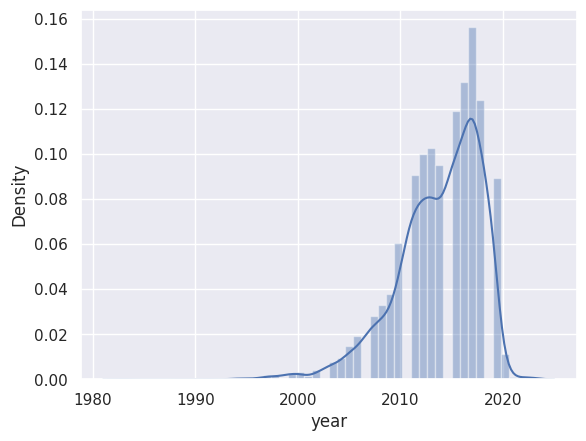

In [ ]:
sns.distplot(df.year)

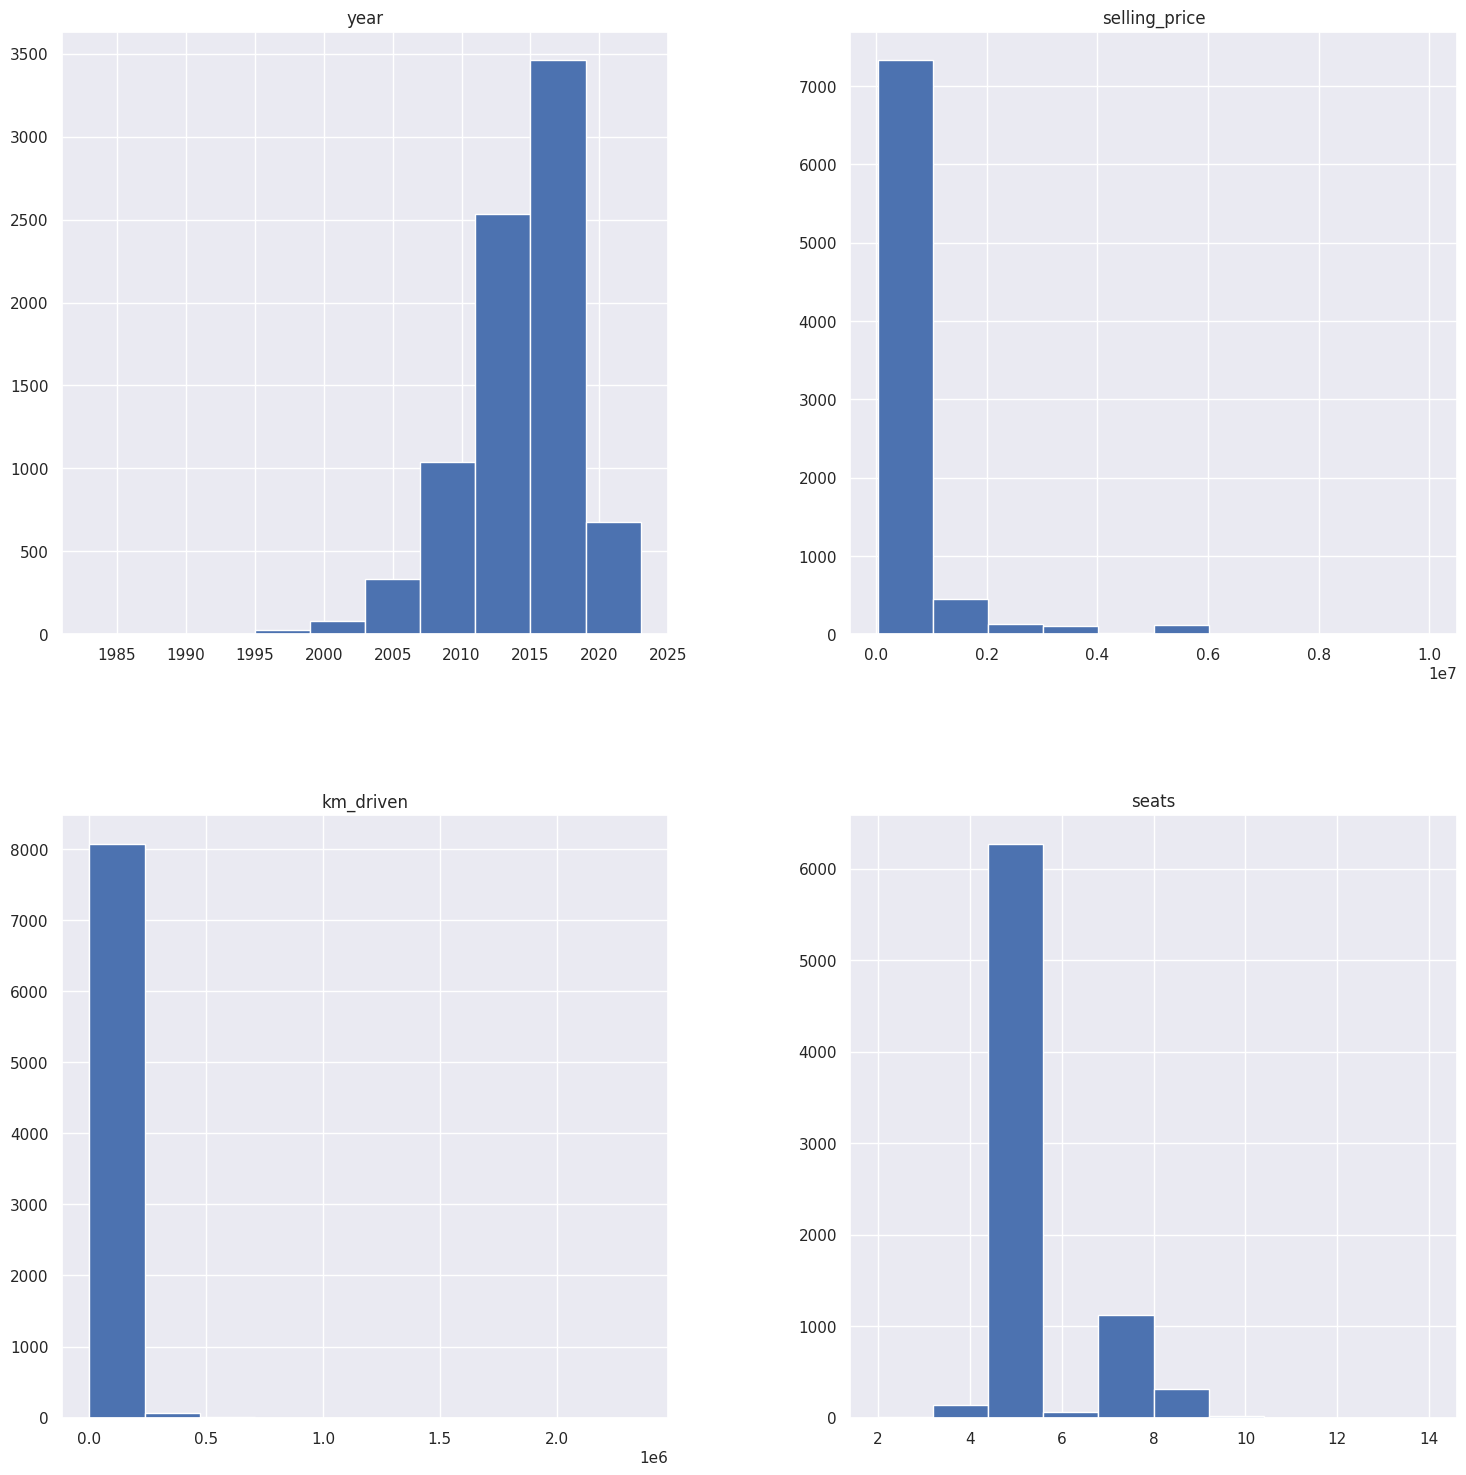

In [ ]:
fig = df.hist(figsize=(18,18))

<Axes: xlabel='seller_type', ylabel='selling_price'>

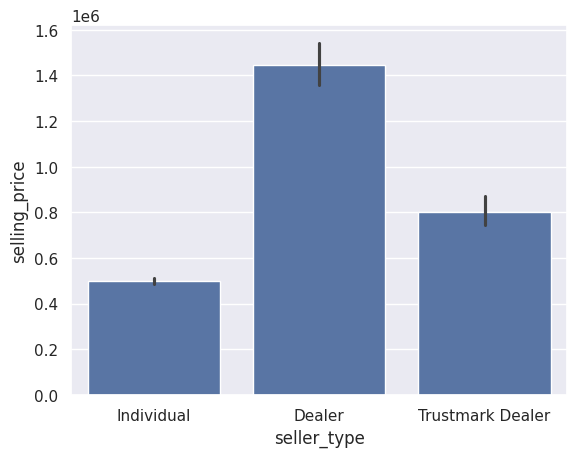

In [ ]:
sns.barplot(x='seller_type',y='selling_price',data=df)

/tmp/ipython-input-1562395326.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fuel',y='selling_price',data=df,palette='twilight')


<Axes: xlabel='fuel', ylabel='selling_price'>

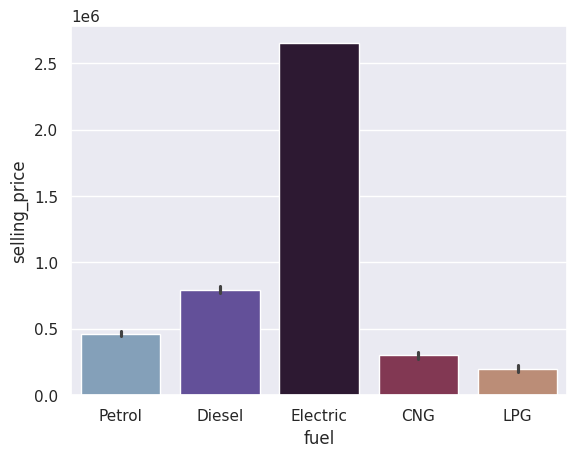

In [ ]:
sns.barplot(x='fuel',y='selling_price',data=df,palette='twilight')

<Axes: xlabel='selling_price', ylabel='year'>

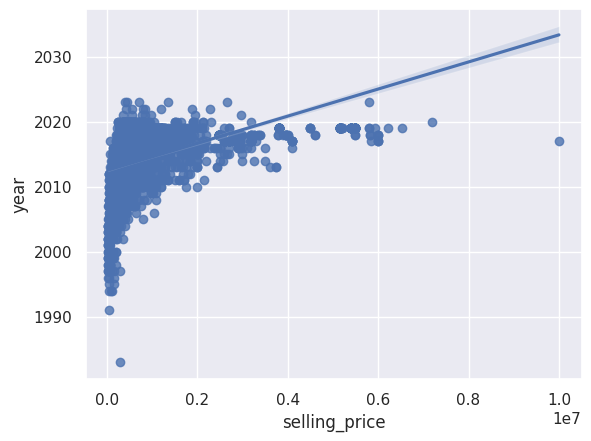

In [ ]:
sns.regplot(x='selling_price',y='year',data=df)

/tmp/ipython-input-664683601.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transmission',y='selling_price',data=df,palette='spring')


<Axes: xlabel='transmission', ylabel='selling_price'>

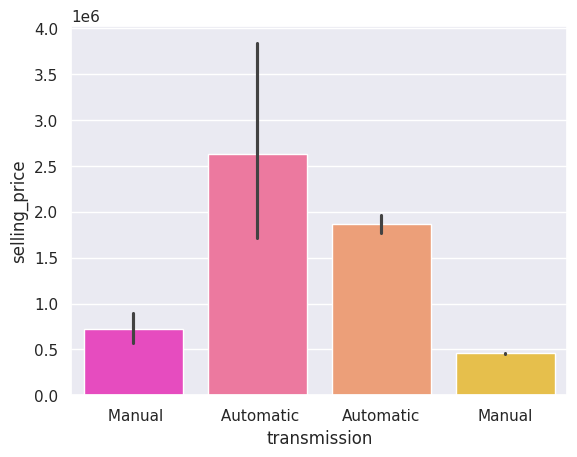

In [ ]:
sns.barplot(x='transmission',y='selling_price',data=df,palette='spring')

<Axes: xlabel='selling_price', ylabel='km_driven'>

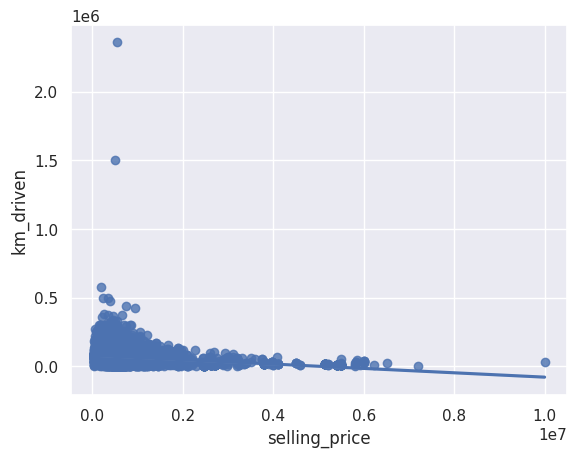

In [ ]:
sns.regplot(x='selling_price',y='km_driven',data=df)

/tmp/ipython-input-2214835253.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='owner',y='selling_price',data=df,palette='ocean')


<Axes: xlabel='owner', ylabel='selling_price'>

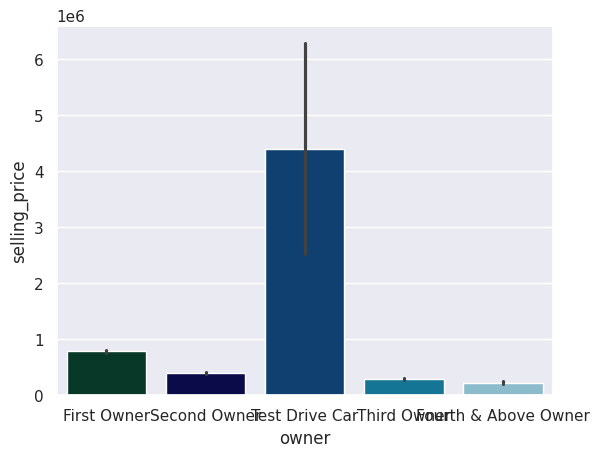

In [ ]:
sns.barplot(x='owner',y='selling_price',data=df,palette='ocean')

In [ ]:
def plot_categorical(feature,datasset):
  ax=sns.countplot(y=feature,data=datasset)
  plt.title('Disribution of'+ feature)
  plt.xlabel('count')

  total = len (datasset[feature])
  for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(percentage, (x, y))
  plt.show()


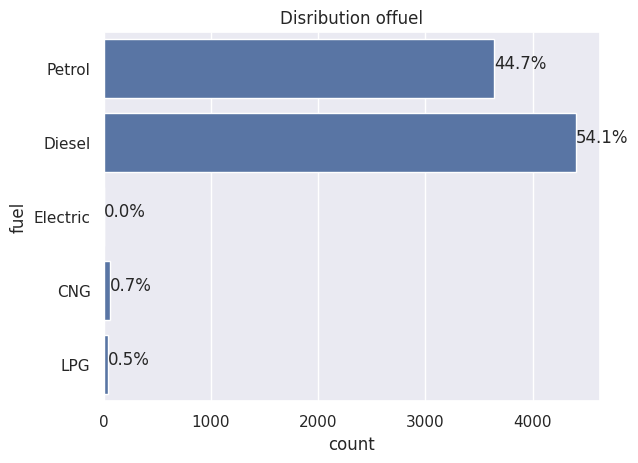

In [ ]:
plot_categorical('fuel',df)

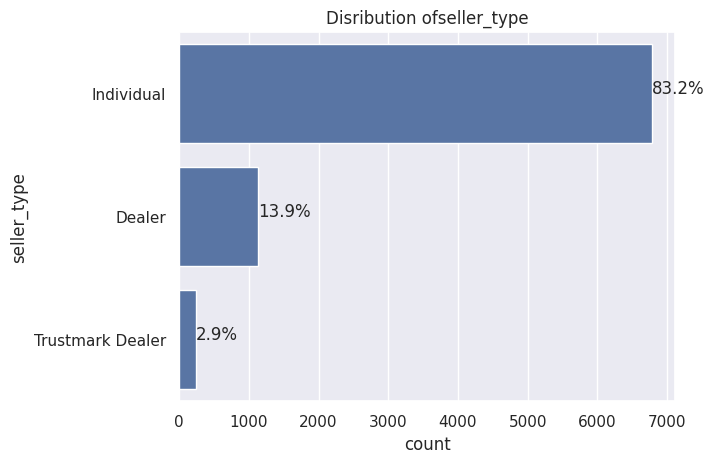

In [ ]:
plot_categorical('seller_type',df)

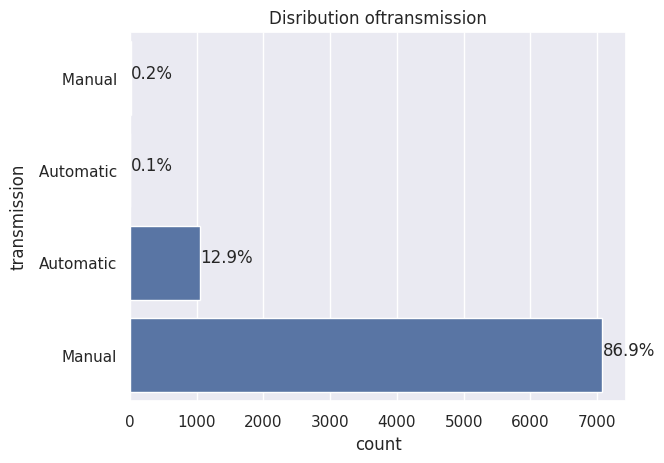

In [ ]:
plot_categorical('transmission',df)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weather.csv to weather.csv


In [ ]:
import numpy as numpyInstace
import pandas as pandasInstance
import matplotlib.pyplot as matplotlibInstance
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as matplotlibInstance
import os
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filenames in filenames:
      print(os.path.join(dirname,filename))

In [ ]:
weatherData = pandasInstance.read_csv('weather.csv')
weatherData.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [ ]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

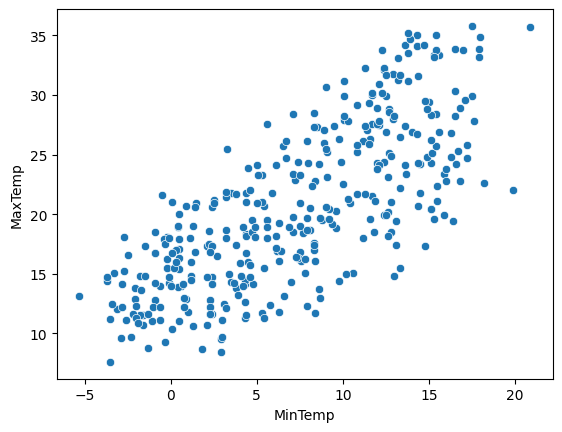

In [ ]:
seabornInstance.scatterplot(x='MinTemp',y='MaxTemp',data=weatherData)

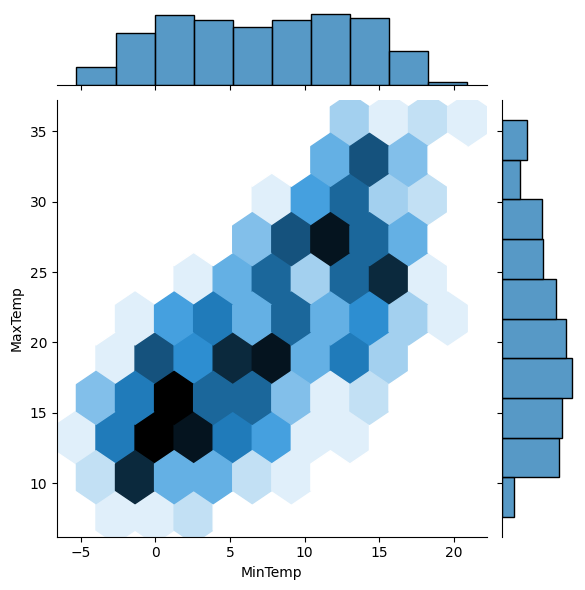

In [ ]:
seabornInstance.jointplot(x='MinTemp',y='MaxTemp',data=weatherData,kind='hex')

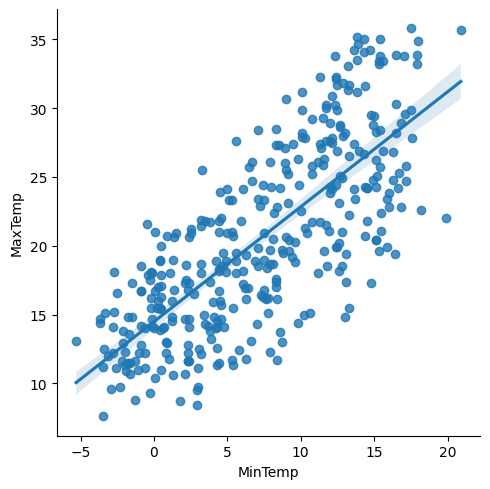

In [ ]:
seabornInstance.lmplot(x='MinTemp',y='MaxTemp',data=weatherData)

In [ ]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

/tmp/ipython-input-2278180270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weatherData['MaxTemp'])


<Axes: xlabel='MaxTemp', ylabel='Density'>

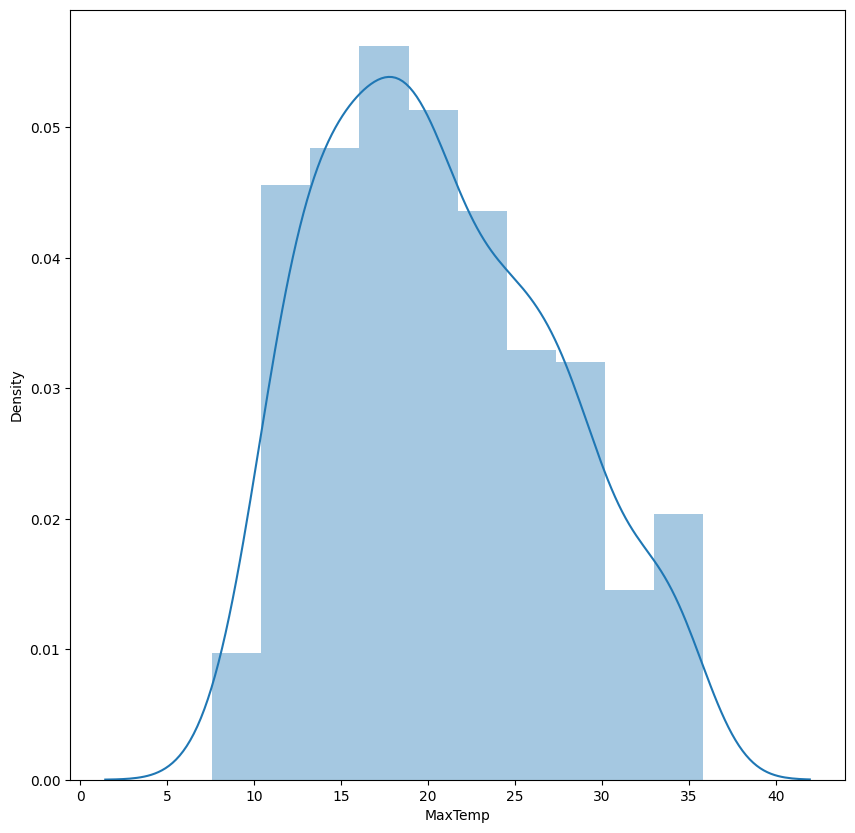

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
plt.tight_layout()
sns.distplot(weatherData['MaxTemp'])

Current Directory: /content


FileNotFoundError: [Errno 2] No such file or directory: 'weather.csv'

In [ ]:
x_test = weatherData[['MaxTemp']]
print(x_test)

     MaxTemp
0       24.3
1       26.9
2       23.4
3       15.5
4       16.1
..       ...
361     30.7
362     28.4
363     19.9
364     26.9
365     30.2

[366 rows x 1 columns]


In [ ]:
y_Prediction = weatherData[['MinTemp']]
print(y_Prediction)

     MinTemp
0        8.0
1       14.0
2       13.7
3       13.3
4        7.6
..       ...
361      9.0
362      7.1
363     12.5
364     12.5
365     12.3

[366 rows x 1 columns]


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_test,y_Prediction)
temperaturePrediction=model.predict(x_test)
print(temperaturePrediction)


[[ 9.80680616]
 [11.56885566]
 [ 9.19686594]
 [ 3.8429463 ]
 [ 4.24957311]
 [ 4.79174219]
 [ 5.67276694]
 [ 4.85951332]
 [ 6.55379169]
 [ 8.79023914]
 [10.41674637]
 [11.8399402 ]
 [12.24656701]
 [14.27970105]
 [14.48301445]
 [15.09295467]
 [14.48301445]
 [13.66976084]
 [15.22849694]
 [15.97397942]
 [15.97397942]
 [ 6.48602055]
 [ 5.87608034]
 [ 9.80680616]
 [12.58542268]
 [11.56885566]
 [ 8.38361233]
 [12.31433814]
 [ 9.80680616]
 [ 9.67126389]
 [ 7.1637319 ]
 [11.16222885]
 [ 9.73903502]
 [11.29777112]
 [ 8.11252779]
 [11.50108452]
 [10.82337318]
 [12.44988041]
 [13.26313403]
 [10.14566183]
 [ 5.87608034]
 [ 7.90921438]
 [ 7.09596077]
 [11.70439793]
 [13.6019897 ]
 [ 7.63812984]
 [ 8.04475665]
 [ 7.50258758]
 [ 7.57035871]
 [ 8.99355254]
 [13.33090516]
 [ 8.24807006]
 [ 7.1637319 ]
 [ 9.87457729]
 [ 8.04475665]
 [11.16222885]
 [11.43331339]
 [12.51765155]
 [14.75409899]
 [17.05831757]
 [16.04175055]
 [16.5161485 ]
 [17.05831757]
 [ 9.19686594]
 [10.4845175 ]
 [11.97548247]
 [16.44837

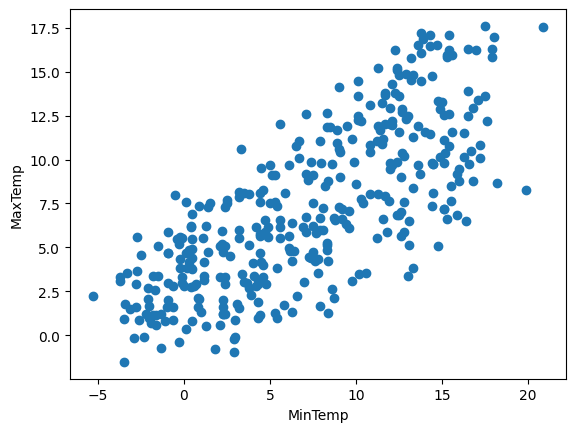

In [ ]:
matplotlibInstance.scatter(y_Prediction,temperaturePrediction)
matplotlibInstance.xlabel('MinTemp')
matplotlibInstance.ylabel('MaxTemp')
matplotlibInstance.show()

/tmp/ipython-input-16499474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_Prediction-temperaturePrediction)


<Axes: ylabel='Density'>

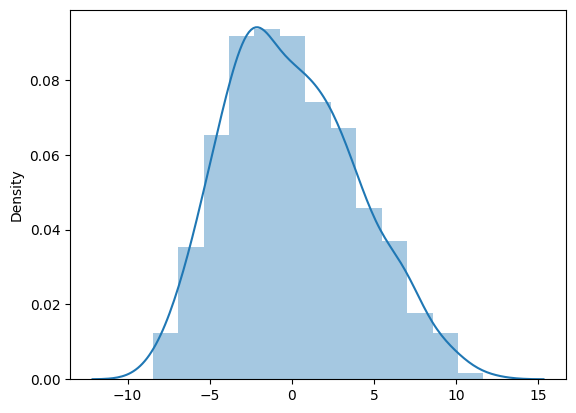

In [ ]:
sns.distplot(y_Prediction-temperaturePrediction)

In [ ]:
from sklearn import metrics
metrics.mean_absolute_error(y_Prediction,temperaturePrediction)

3.2587454552610393

In [ ]:
metrics.mean_squared_error(y_Prediction,temperaturePrediction)

15.707910500008836

In [ ]:
numpyInstace.sqrt(metrics.mean_squared_error(y_Prediction,temperaturePrediction))

np.float64(3.963320640575127)

In [ ]:
model.coef_

array([[0.67771135]])

In [ ]:
model.coef_

array([[0.67771135]])